## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

## Loading the data

In [3]:
df = pd.read_csv('wine-quality-white-and-red.csv')


In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Data Visualization

D:\SoftwaresInstalled\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


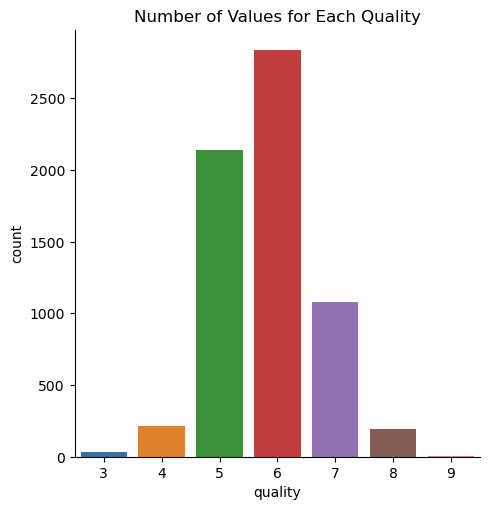

In [7]:
# Number of values for each quality:

sns.catplot(x='quality', data=df, kind='count')
plt.title('Number of Values for Each Quality')
plt.show()


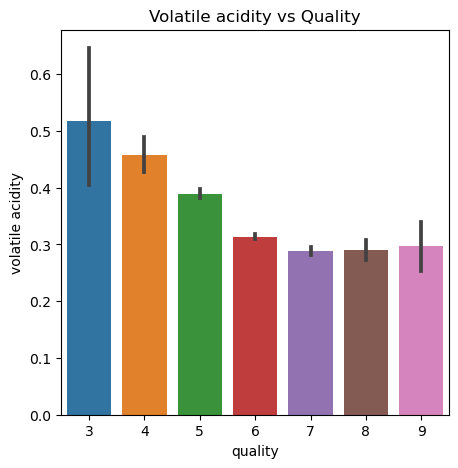

In [8]:
# Volatile Acidity vs Quality:

plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile acidity vs Quality')
plt.show()

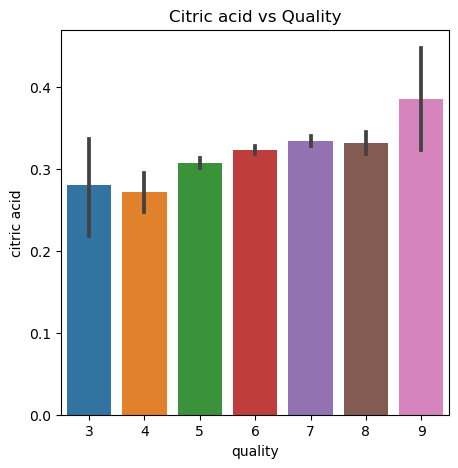

In [9]:
# Citric Acid vs Quality:

plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)
plt.title('Citric acid vs Quality')
plt.show()

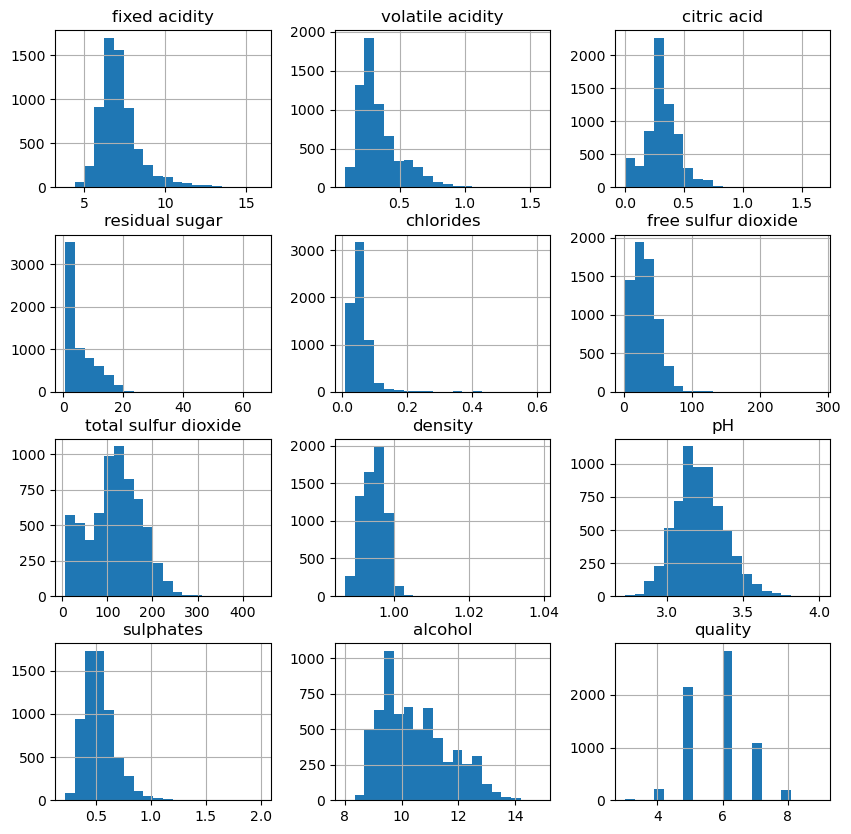

In [14]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

## Data Preprocessing

In [15]:
# Check for missing values
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

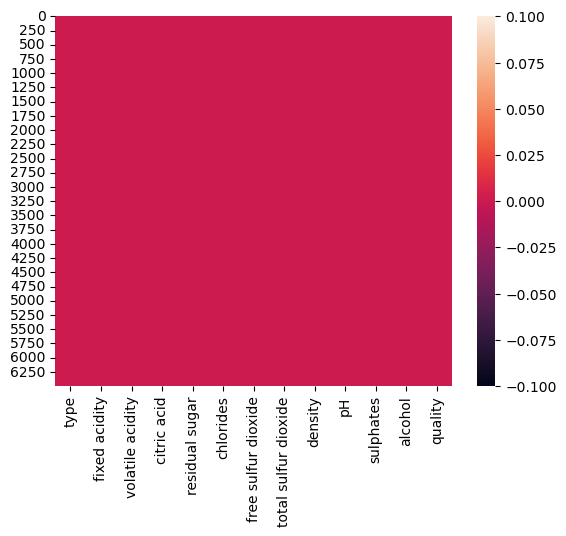

In [16]:
import seaborn as sns 
sns.heatmap(df.isnull())
plt.show()

## Encoding Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])


In [18]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,0,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


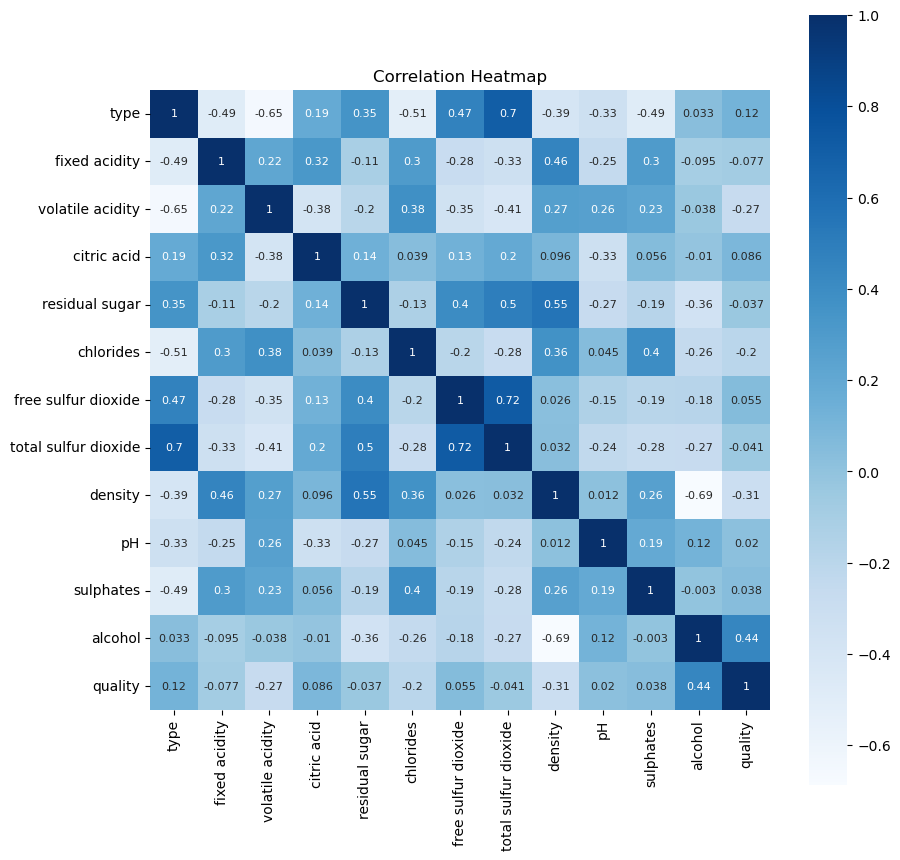

In [20]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


# Handling Outliers

## TYPE

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\364590236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['type'])


<Axes: xlabel='type', ylabel='Density'>

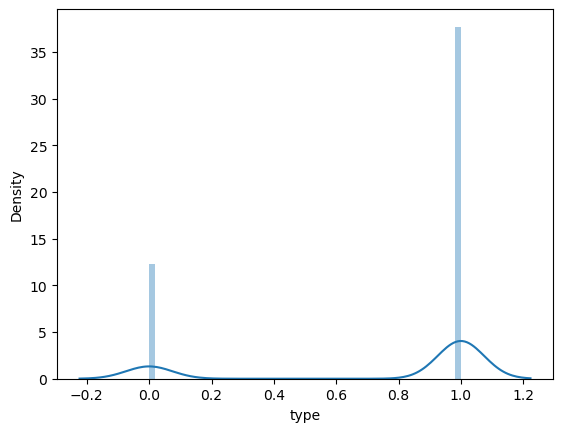

In [21]:
sns.distplot(df['type'])

<Axes: >

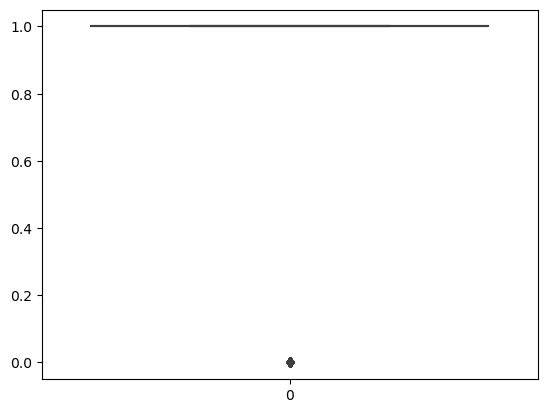

In [22]:
sns.boxplot(df['type'])

In [23]:
q1 = df['type'].quantile(0.25)
q3 = df['type'].quantile(0.75)
iqr = q3 - q1

In [24]:
q1 , q3 , iqr

(1.0, 1.0, 0.0)

In [25]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(1.0, 1.0)

In [26]:
df.loc[(df['type'] > upper_limit) | (df['type'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,0,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,0,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,0,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
new_df = df.loc[(df['type'] < upper_limit) & (df['type'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 0
Outliers : 6497


<Axes: >

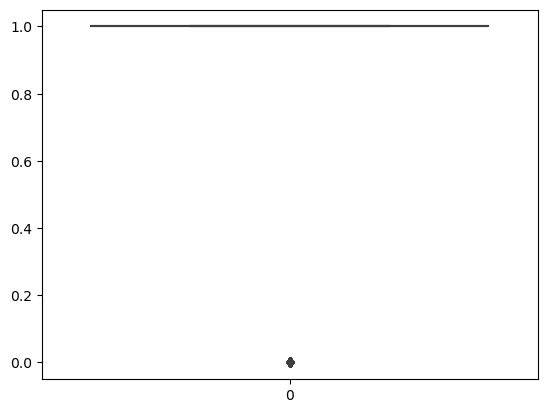

In [132]:
sns.boxplot(new_df['type'])

# Fixed Acidity

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\1506967435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fixed acidity'])


<Axes: xlabel='fixed acidity', ylabel='Density'>

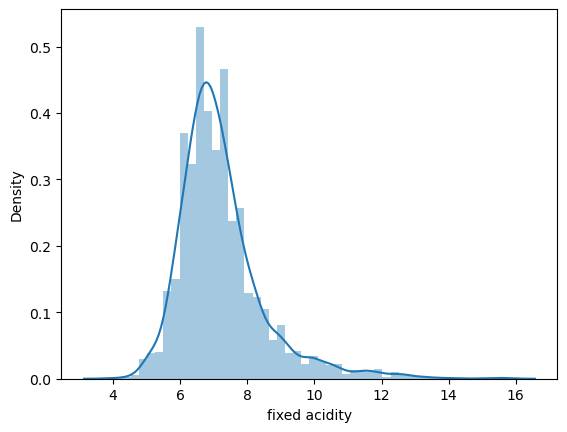

In [29]:
sns.distplot(df['fixed acidity'])

<Axes: >

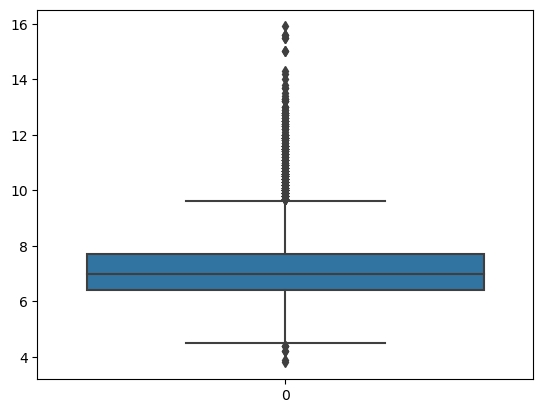

In [30]:
sns.boxplot(df['fixed acidity'])

In [31]:
q1 = df['fixed acidity'].quantile(0.25)
q3 = df['fixed acidity'].quantile(0.75)
iqr = q3 - q1

In [32]:
q1 , q3 , iqr

(6.4, 7.7, 1.2999999999999998)

In [33]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(4.450000000000001, 9.65)

In [34]:
df.loc[(df['fixed acidity'] > upper_limit) | (df['fixed acidity'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,1,9.8,0.36,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4
169,1,9.8,0.42,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5
207,1,10.2,0.44,0.88,6.20,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,4
358,1,10.0,0.20,0.39,1.40,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
873,1,10.3,0.17,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,0,10.0,0.69,0.11,1.40,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5
6372,0,9.9,0.50,0.50,13.80,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
6374,0,9.9,0.50,0.50,13.80,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
6441,0,11.1,0.44,0.42,2.20,0.064,14.0,19.0,0.99758,3.25,0.57,10.4,6


In [35]:
new_df = df.loc[(df['fixed acidity'] < upper_limit) & (df['fixed acidity'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6140
Outliers : 357


<Axes: >

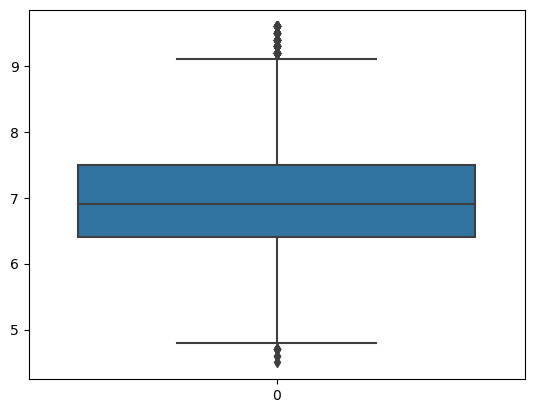

In [36]:
sns.boxplot(new_df['fixed acidity'])

# Citric Acid

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\2338668416.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['citric acid'])


<Axes: xlabel='citric acid', ylabel='Density'>

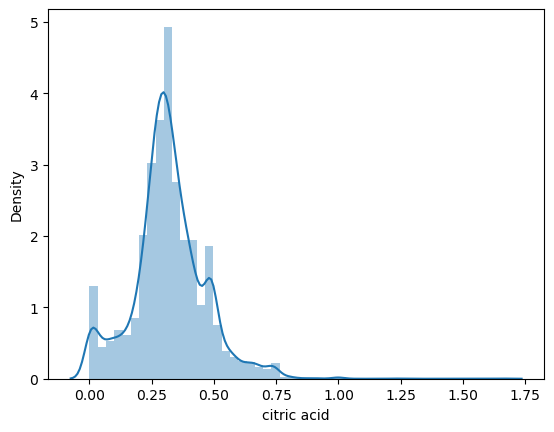

In [37]:
sns.distplot(df['citric acid'])

<Axes: >

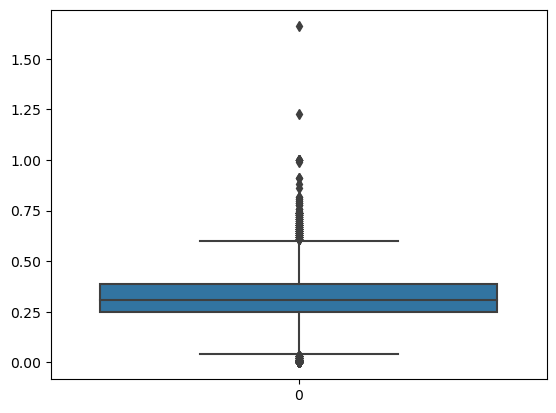

In [38]:
sns.boxplot(df['citric acid'])

In [39]:
q1 = df['citric acid'].quantile(0.25)
q3 = df['citric acid'].quantile(0.75)
iqr = q3 - q1

In [40]:
q1 , q3 , iqr

(0.25, 0.39, 0.14)

In [41]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(0.03999999999999998, 0.6000000000000001)

In [42]:
df.loc[(df['citric acid'] > upper_limit) | (df['citric acid'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,1,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
65,1,6.2,0.350,0.03,1.20,0.064,29.0,120.0,0.99340,3.22,0.54,9.1,5
84,1,7.1,0.430,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.7,5
85,1,7.1,0.440,0.62,11.80,0.044,52.0,152.0,0.99750,3.12,0.46,8.7,6
86,1,7.2,0.390,0.63,11.00,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,0,6.6,0.855,0.02,2.40,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,6
6463,0,6.7,0.670,0.02,1.90,0.061,26.0,42.0,0.99489,3.39,0.82,10.9,6
6464,0,6.7,0.160,0.64,2.10,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6
6472,0,5.6,0.310,0.78,13.90,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6


In [43]:
new_df = df.loc[(df['citric acid'] < upper_limit) & (df['citric acid'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 5988
Outliers : 509


<Axes: >

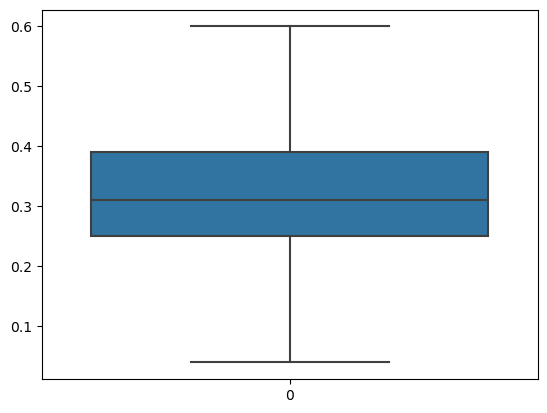

In [44]:
sns.boxplot(new_df['citric acid'])

# Residual Sugar

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\107078400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

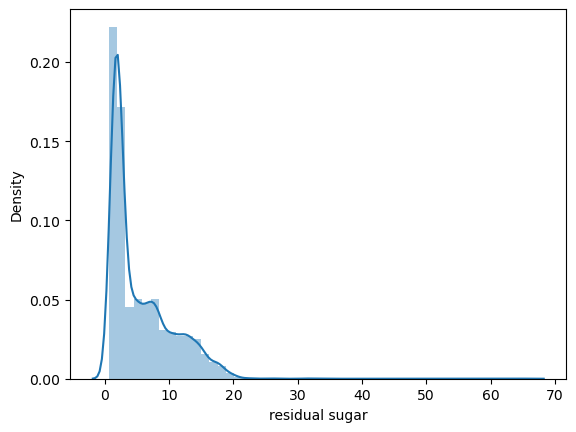

In [45]:
sns.distplot(df['residual sugar'])

<Axes: >

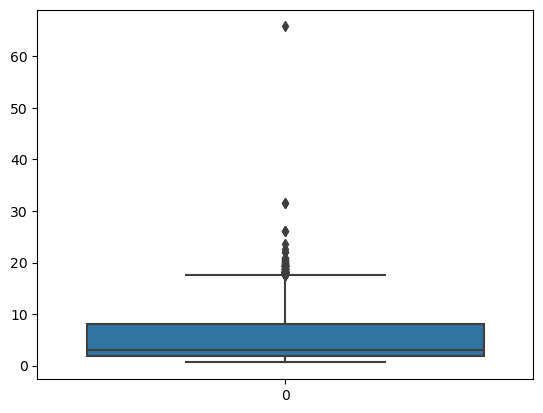

In [46]:
sns.boxplot(df['residual sugar'])

In [47]:
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
iqr = q3 - q1

In [48]:
q1 , q3 , iqr

(1.8, 8.1, 6.3)

In [49]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(-7.6499999999999995, 17.549999999999997)

In [50]:
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,1,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,1,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
38,1,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
39,1,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,1,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4694,1,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4748,1,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30,5
4749,1,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6


In [51]:
new_df = df.loc[(df['residual sugar'] < upper_limit) & (df['residual sugar'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6379
Outliers : 118


<Axes: >

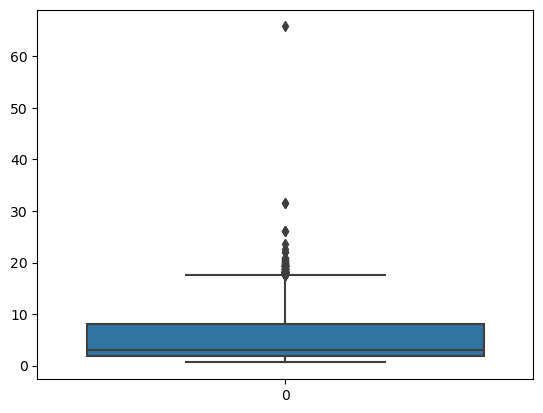

In [133]:
sns.boxplot(new_df['residual sugar'])

# Chlorides	

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\1613303712.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chlorides'])


<Axes: xlabel='chlorides', ylabel='Density'>

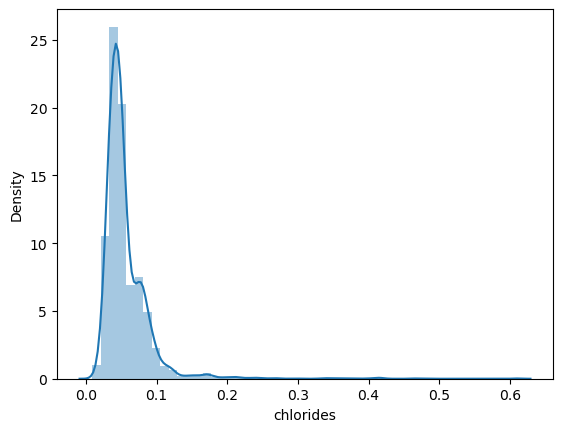

In [53]:
sns.distplot(df['chlorides'])

<Axes: >

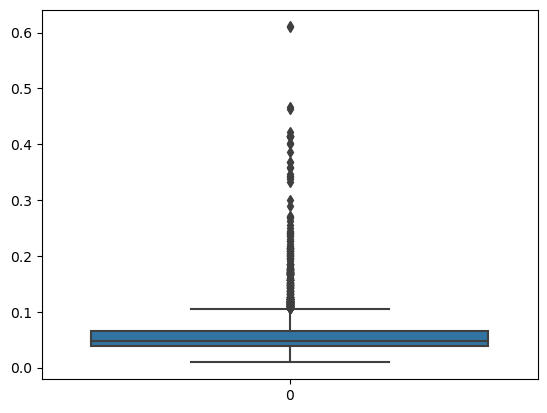

In [54]:
sns.boxplot(df['chlorides'])

In [55]:
q1 = df['chlorides'].quantile(0.25)
q3 = df['chlorides'].quantile(0.75)
iqr = q3 - q1

In [56]:
q1 , q3 , iqr

(0.038, 0.065, 0.027000000000000003)

In [57]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(-0.002500000000000009, 0.10550000000000001)

In [58]:
df.loc[(df['chlorides'] > upper_limit) | (df['chlorides'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
40,1,6.7,0.23,0.39,2.5,0.172,63.0,158.0,0.99370,3.11,0.36,9.4,6
41,1,6.7,0.24,0.39,2.9,0.173,63.0,157.0,0.99370,3.10,0.34,9.4,6
54,1,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6
194,1,6.4,0.29,0.44,3.6,0.200,75.0,181.0,0.99420,3.02,0.41,9.1,5
195,1,6.4,0.30,0.45,3.5,0.197,76.0,180.0,0.99420,3.02,0.39,9.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,0,7.4,0.47,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5,5
6417,0,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5
6456,0,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
6468,0,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6


In [59]:
new_df = df.loc[(df['chlorides'] < upper_limit) & (df['chlorides'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6211
Outliers : 286


<Axes: >

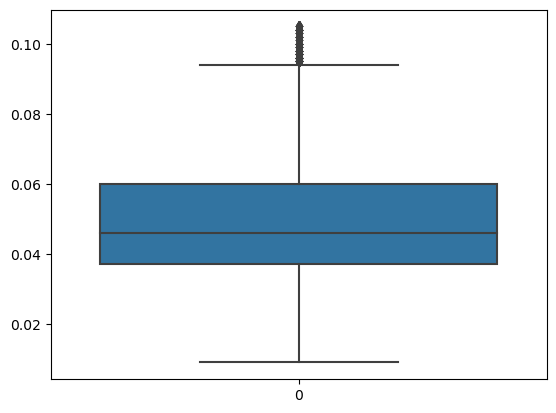

In [60]:
sns.boxplot(new_df['chlorides'])

# free sulfur dioxide

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\2700524578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total sulfur dioxide'])


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

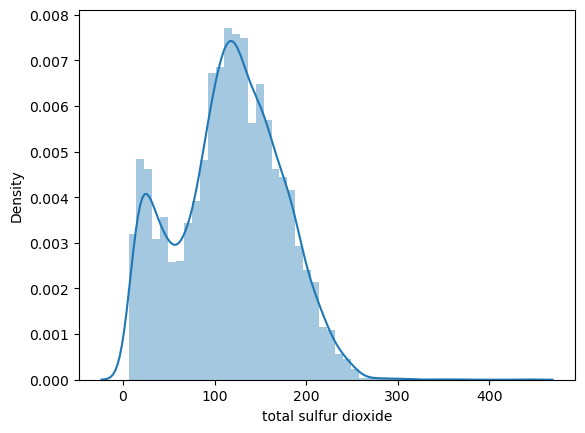

In [61]:
sns.distplot(df['total sulfur dioxide'])

<Axes: >

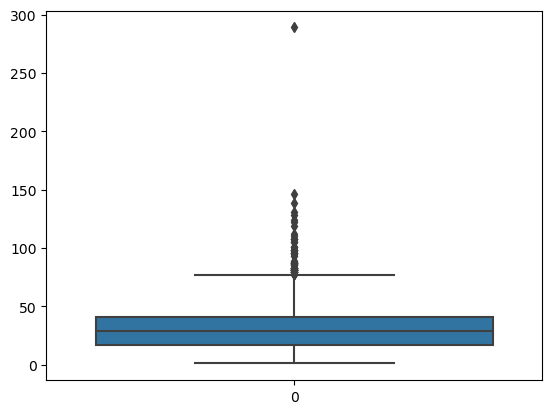

In [62]:
sns.boxplot(df['free sulfur dioxide'])

In [63]:
q1 = df['free sulfur dioxide'].quantile(0.25)
q3 = df['free sulfur dioxide'].quantile(0.75)
iqr = q3 - q1

In [64]:
q1 , q3 , iqr

(17.0, 41.0, 24.0)

In [65]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(-19.0, 77.0)

In [66]:
df.loc[(df['free sulfur dioxide'] > upper_limit) | (df['free sulfur dioxide'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,1,6.7,0.25,0.13,1.2,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
297,1,7.2,0.19,0.46,3.8,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
325,1,7.5,0.27,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,1,6.3,0.39,0.35,5.9,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
395,1,6.8,0.27,0.12,1.3,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,1,6.9,0.24,0.40,15.4,0.052,81.0,198.0,0.99860,3.20,0.69,9.4,5
4185,1,6.9,0.24,0.40,15.4,0.052,81.0,198.0,0.99860,3.20,0.69,9.4,5
4523,1,6.7,0.18,0.25,14.3,0.048,79.0,149.0,0.99750,3.12,0.37,9.7,5
4745,1,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


In [67]:
new_df = df.loc[(df['free sulfur dioxide'] < upper_limit) & (df['free sulfur dioxide'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6430
Outliers : 67


<Axes: >

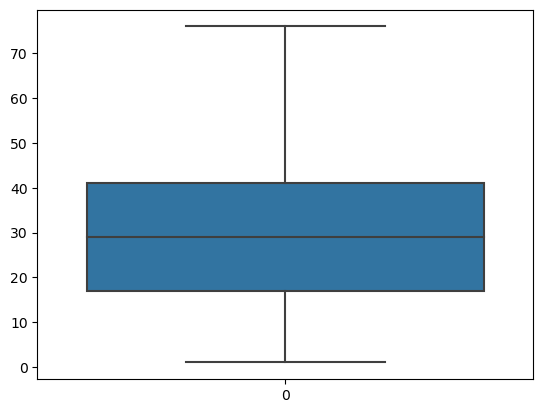

In [68]:
sns.boxplot(new_df['free sulfur dioxide'])

# total sulfur dioxide

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\2700524578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total sulfur dioxide'])


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

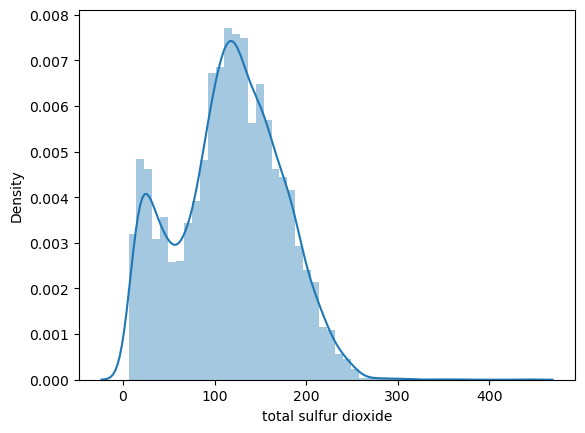

In [69]:
sns.distplot(df['total sulfur dioxide'])

<Axes: >

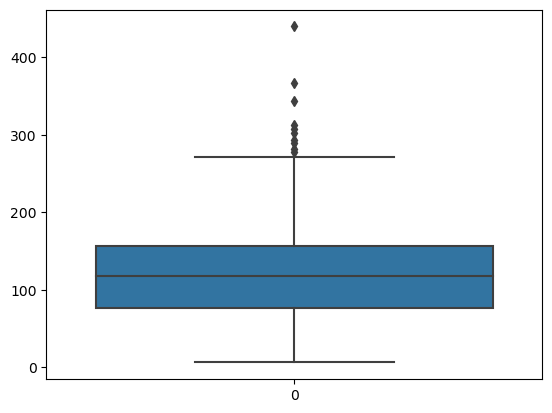

In [70]:
sns.boxplot(df['total sulfur dioxide'])

In [71]:
q1 = df['total sulfur dioxide'].quantile(0.25)
q3 = df['total sulfur dioxide'].quantile(0.75)
iqr = q3 - q1

In [72]:
q1 , q3 , iqr

(77.0, 156.0, 79.0)

In [73]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(-41.5, 274.5)

In [74]:
df.loc[(df['total sulfur dioxide'] > upper_limit) | (df['total sulfur dioxide'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
325,1,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
1417,1,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,1,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
2127,1,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
2378,1,9.4,0.23,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5
2654,1,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5
3152,1,7.6,0.25,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6
4745,1,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
5977,0,7.9,0.30,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
5979,0,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7


In [75]:
new_df = df.loc[(df['total sulfur dioxide'] < upper_limit) & (df['total sulfur dioxide'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6487
Outliers : 10


<Axes: >

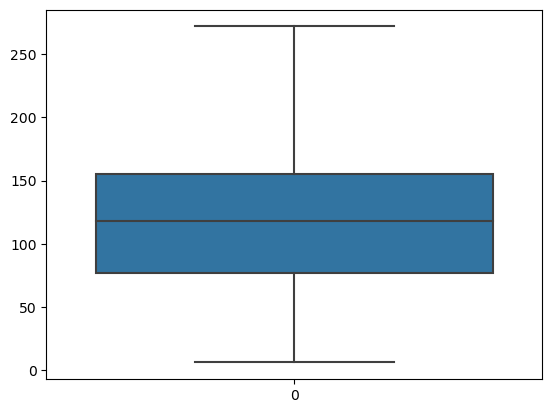

In [76]:
sns.boxplot(new_df['total sulfur dioxide'])

# density

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\4104559847.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['density'])


<Axes: xlabel='density', ylabel='Density'>

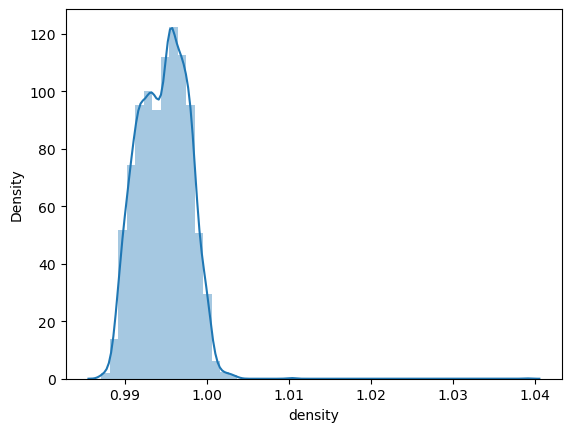

In [77]:
sns.distplot(df['density'])

<Axes: >

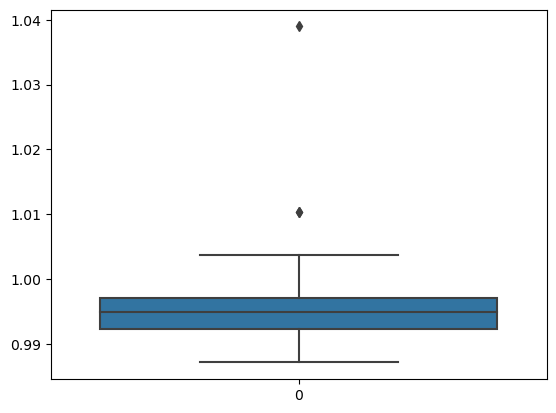

In [78]:
sns.boxplot(df['density'])

In [79]:
q1 = df['density'].quantile(0.25)
q3 = df['density'].quantile(0.75)
iqr = q3 - q1

In [80]:
q1 , q3 , iqr

(0.99234, 0.99699, 0.004650000000000043)

In [81]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(0.9853649999999999, 1.003965)

In [82]:
df.loc[(df['density'] > upper_limit) | (df['density'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,1,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,1,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,1,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [83]:
new_df = df.loc[(df['density'] < upper_limit) & (df['density'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6494
Outliers : 3


<Axes: >

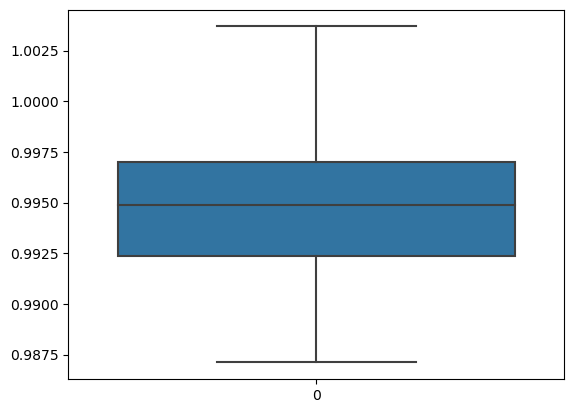

In [84]:
sns.boxplot(new_df['density'])

# pH

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\1614621123.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pH'])


<Axes: xlabel='pH', ylabel='Density'>

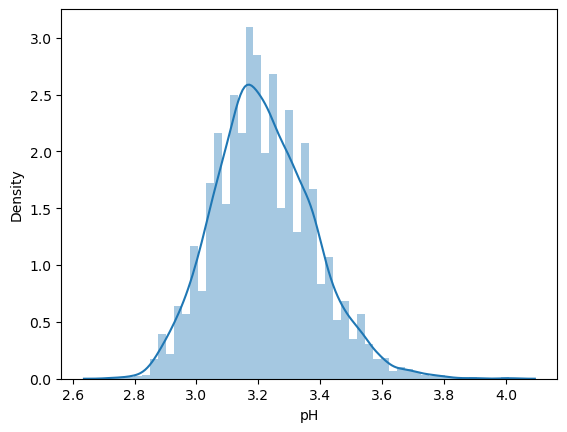

In [85]:
sns.distplot(df['pH'])

<Axes: >

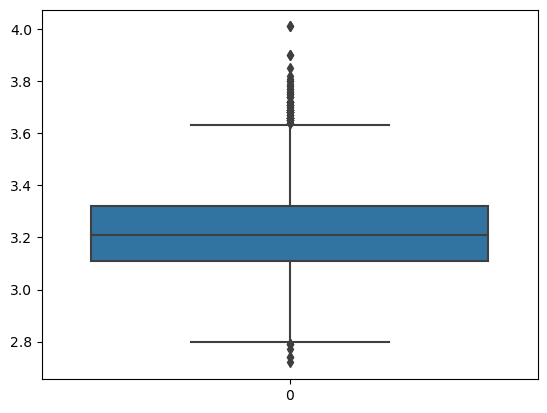

In [86]:
sns.boxplot(df['pH'])

In [87]:
q1 = df['pH'].quantile(0.25)
q3 = df['pH'].quantile(0.75)
iqr = q3 - q1

In [88]:
q1 , q3 , iqr

(3.11, 3.32, 0.20999999999999996)

In [89]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(2.795, 3.635)

In [90]:
df.loc[(df['pH'] > upper_limit) | (df['pH'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,1,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5
250,1,5.9,0.210,0.28,4.6,0.053,40.0,199.0,0.99640,3.72,0.70,10.0,4
507,1,6.0,0.240,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
509,1,6.0,0.240,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
830,1,7.3,0.205,0.31,1.7,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,0,5.2,0.490,0.26,2.3,0.090,23.0,74.0,0.99530,3.71,0.62,12.2,6
6378,0,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,4
6386,0,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
6389,0,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5


In [91]:
new_df = df.loc[(df['pH'] < upper_limit) & (df['pH'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6424
Outliers : 73


<Axes: >

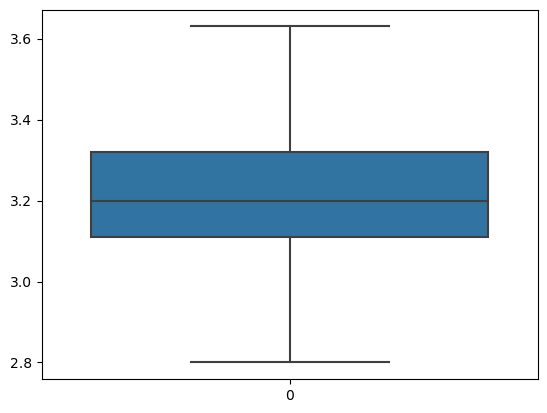

In [92]:
sns.boxplot(new_df['pH'])

# sulphates

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\1195402505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sulphates'])


<Axes: xlabel='sulphates', ylabel='Density'>

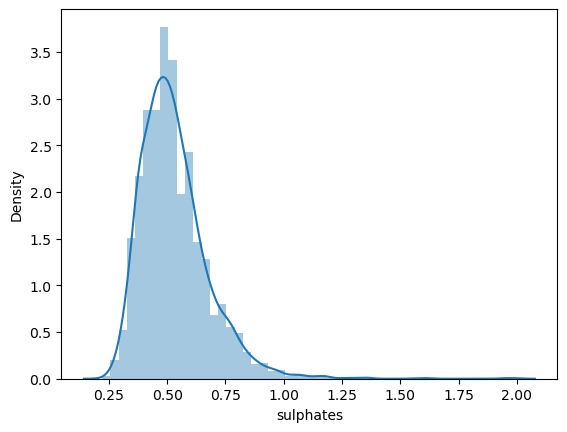

In [93]:
sns.distplot(df['sulphates'])

<Axes: >

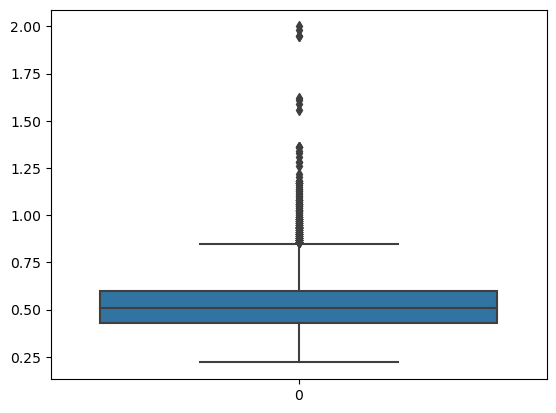

In [94]:
sns.boxplot(df['sulphates'])

In [95]:
q1 = df['sulphates'].quantile(0.25)
q3 = df['sulphates'].quantile(0.75)
iqr = q3 - q1

In [96]:
q1 , q3 , iqr

(0.43, 0.6, 0.16999999999999998)

In [97]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(0.175, 0.855)

In [98]:
df.loc[(df['sulphates'] > upper_limit) | (df['sulphates'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
758,1,7.1,0.14,0.40,1.2,0.051,55.0,136.0,0.99320,3.30,0.96,9.800000,7
759,1,7.1,0.13,0.40,1.2,0.047,54.0,134.0,0.99320,3.30,0.97,9.800000,7
852,1,6.9,0.18,0.36,1.3,0.036,40.0,117.0,0.99340,3.27,0.95,9.500000,7
854,1,6.9,0.18,0.36,1.3,0.036,40.0,117.0,0.99340,3.27,0.95,9.500000,7
866,1,6.9,0.18,0.36,1.3,0.036,40.0,117.0,0.99340,3.27,0.95,9.500000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,0,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7
6375,0,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.600000,7
6414,0,6.1,0.32,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.600000,5
6420,0,6.1,0.32,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.600000,5


In [99]:
new_df = df.loc[(df['sulphates'] < upper_limit) & (df['sulphates'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6306
Outliers : 191


<Axes: >

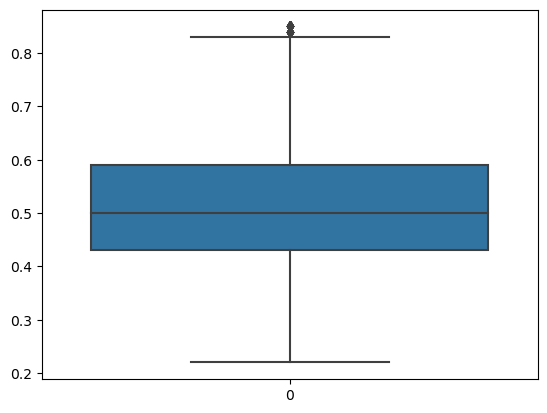

In [100]:
sns.boxplot(new_df['sulphates'])

# alcohol

C:\Users\patil\AppData\Local\Temp\ipykernel_11020\2398698211.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

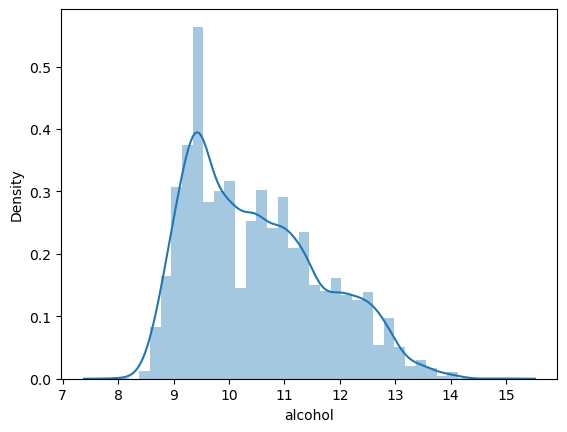

In [101]:
sns.distplot(df['alcohol'])

<Axes: >

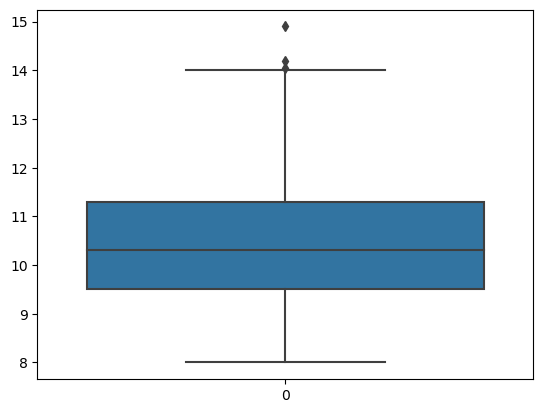

In [102]:
sns.boxplot(df['alcohol'])

In [103]:
q1 = df['alcohol'].quantile(0.25)
q3 = df['alcohol'].quantile(0.75)
iqr = q3 - q1

In [104]:
q1 , q3 , iqr

(9.5, 11.3, 1.8000000000000007)

In [105]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit , upper_limit

(6.799999999999999, 14.000000000000002)

In [106]:
new_df.loc[(df['alcohol'] > upper_limit) | (df['alcohol'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3918,1,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7
4503,1,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7
5550,0,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5


In [107]:
new_df = df.loc[(df['alcohol'] < upper_limit) & (df['alcohol'] > lower_limit)]
print('Before removing outliers :' , len(df))
print('After removing outliers :' , len(new_df))
print('Outliers :' , len(df) - len(new_df))

Before removing outliers : 6497
After removing outliers : 6494
Outliers : 3


<Axes: >

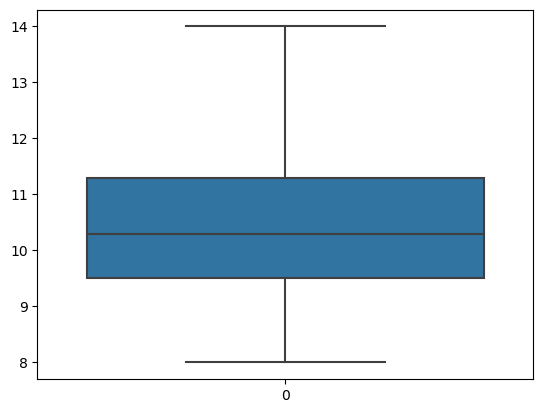

In [108]:
sns.boxplot(new_df['alcohol'])

In [109]:
print(f"Data shape before outlier removal: {df.shape}")

Data shape before outlier removal: (6497, 13)


In [110]:
print(f"Data shape after outlier removal: {new_df.shape}")

Data shape after outlier removal: (6494, 13)


# Splitting the Data

In [128]:
X = new_df.drop('quality', axis=1)
Y = new_df['quality'].apply(lambda y_value: 0 if y_value >= 7 else 1)

## Train-Test Split:

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', Y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', Y_test.shape)

Shape of X_train =  (5195, 12)
Shape of y_train =  (5195,)
Shape of X_test =  (1299, 12)
Shape of y_test =  (1299,)


# Model Training and Evaluation

In [137]:
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    class_report = classification_report(Y_test, Y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{class_report}")
    print("_______________________________________________")
    print('Confusion Matrix:')
    print(conf_matrix)

    
    return accuracy, conf_matrix

In [131]:

accuracies = {}

## Logistic Regression:

In [138]:
print("Logistic Regression")
lr_model = LogisticRegression(max_iter=5000)
accuracies['Logistic Regression'] = evaluate_model(lr_model, X_train, X_test, Y_train, Y_test)

Logistic Regression
Accuracy: 0.8045
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.55      0.20      0.29       264
           1       0.82      0.96      0.89      1035

    accuracy                           0.80      1299
   macro avg       0.69      0.58      0.59      1299
weighted avg       0.77      0.80      0.77      1299

_______________________________________________
Confusion Matrix:
[[ 53 211]
 [ 43 992]]


## K-Nearest Neighbors

In [139]:
print("K-Nearest Neighbors")
knn_model = KNeighborsClassifier(n_neighbors=500)
accuracies['K-Nearest Neighbors'] = evaluate_model(knn_model, X_train, X_test, Y_train, Y_test)

K-Nearest Neighbors
Accuracy: 0.7968
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       0.80      1.00      0.89      1035

    accuracy                           0.80      1299
   macro avg       0.40      0.50      0.44      1299
weighted avg       0.63      0.80      0.71      1299

_______________________________________________
Confusion Matrix:
[[   0  264]
 [   0 1035]]


D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree:

In [145]:
print("Decision Tree")
dt_model = DecisionTreeClassifier(random_state=70)
accuracies['Decision Tree'] = evaluate_model(dt_model, X_train, X_test, Y_train, Y_test)

Decision Tree
Accuracy: 0.8514
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       264
           1       0.91      0.90      0.91      1035

    accuracy                           0.85      1299
   macro avg       0.77      0.78      0.77      1299
weighted avg       0.85      0.85      0.85      1299

_______________________________________________
Confusion Matrix:
[[172  92]
 [101 934]]


## Random Forest:

In [143]:
print("Random Forest")
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=200, random_state=50)

# Perform k-fold cross-validation
scores = cross_val_score(random_forest_model, X, Y, cv=kf, scoring='accuracy')
# Print the results
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean():.4f}')
print(f'Standard Deviation: {scores.std():.4f}')

# Fit the Random Forest model with training data
random_forest_model.fit(X_train, Y_train)

# Store mean accuracy in the accuracies dictionary
accuracies['Random Forest'] = (scores.mean(), None)


Random Forest
Cross-Validation Scores: [0.86769231 0.90461538 0.90923077 0.89230769 0.91525424 0.89676425
 0.88597843 0.91679507 0.86748844 0.90138675]
Mean Accuracy: 0.8958
Standard Deviation: 0.0168


## Support Vector Machine:

In [144]:
print("Support Vector Machine")
svm_model = SVC(kernel='linear', random_state=4)
accuracies['Support Vector Machine'] = evaluate_model(svm_model, X_train, X_test, Y_train, Y_test)

Support Vector Machine
Accuracy: 0.7968
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       0.80      1.00      0.89      1035

    accuracy                           0.80      1299
   macro avg       0.40      0.50      0.44      1299
weighted avg       0.63      0.80      0.71      1299

_______________________________________________
Confusion Matrix:
[[   0  264]
 [   0 1035]]


D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting

In [141]:
print("Gradient Boosting")
gb_model = GradientBoostingClassifier(random_state=4)
accuracies['Gradient Boosting']= evaluate_model(gb_model, X_train, X_test, Y_train, Y_test)

Gradient Boosting
Accuracy: 0.8245
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.62      0.34      0.44       264
           1       0.85      0.95      0.90      1035

    accuracy                           0.82      1299
   macro avg       0.74      0.64      0.67      1299
weighted avg       0.80      0.82      0.80      1299

_______________________________________________
Confusion Matrix:
[[ 90 174]
 [ 54 981]]


## all accuracies

In [146]:
print("\nModel Accuracies:")
for model_name, (accuracy, _) in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")


Model Accuracies:
K-Nearest Neighbors: 0.8514
Logistic Regression: 0.8045
Gradient Boosting: 0.8245
Random Forest: 0.8958
Support Vector Machine: 0.7968
Decision Tree: 0.8514


## Plotting accuracies

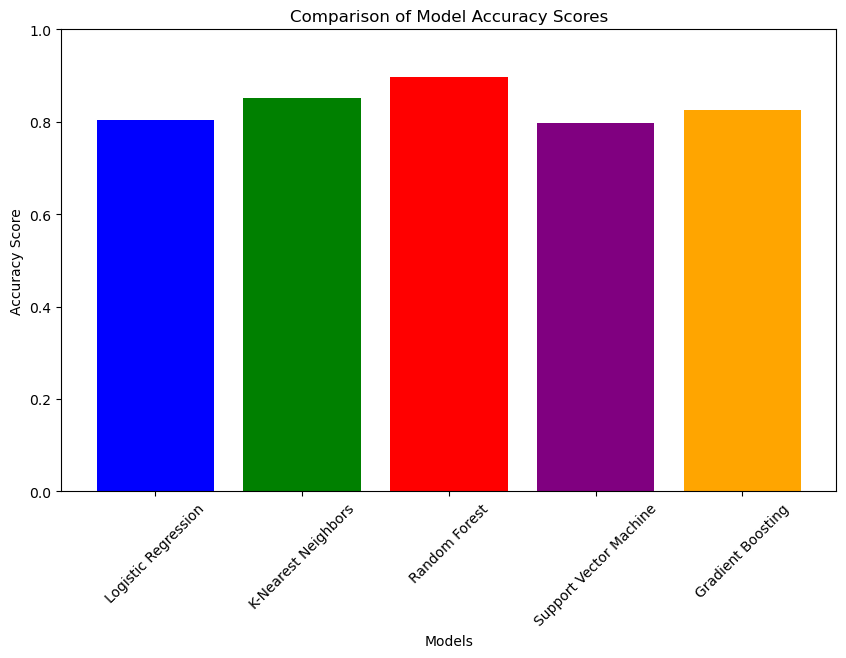

In [122]:
# Accuracy scores of the models
accuracy_scores = [accuracy for accuracy, _ in accuracies.values()]

# Labels for the models
model_labels = list(accuracies.keys())

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_labels, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Conclusion

Based on our analysis, the Random Forest model demonstrated the highest accuracy in predicting wine quality, 
outperforming Logistic Regression, K-Nearest Neighbors, Support Vector Machine, and Gradient Boosting. 
Therefore, we conclude that Random Forest is the most suitable algorithm for our wine quality prediction task, 
providing a balance of high accuracy and robustness.

In [123]:
import joblib

In [124]:
joblib.dump(random_forest_model, 'model_saved')

['model_saved']

In [125]:
loaded_model2 = joblib.load('model_saved')

In [126]:
loaded_model2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Example : 

In [127]:
# Take input features from the user in one line
user_input = input("Enter values for fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and wine type (comma-separated): ")

# Split the input string by commas and convert values to float
input_features = [float(value) for value in user_input.split(',')]

# Make a prediction using the Random Forest model
predicted_value = random_forest_model.predict([input_features])[0]

# Map predicted value to quality label
predicted_quality = "Good" if predicted_value == 1 else "Bad"

# Display the prediction
print("\nPredicted Wine Quality:", predicted_quality)


Enter values for fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and wine type (comma-separated): 1,7.1,0.14,0.40,1.2,0.051,55.0,136.0,0.99320,3.30,0.96,9.800000	

Predicted Wine Quality: Good


D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
